In [18]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy

In [19]:
root_dir='/Users/robinruhm/Documents/Research/Fire Hydrology/SlaterFireHydrology';
data_dir=root_dir+'/data';
processed_dir =data_dir+'/Processed';
raw_dir=data_dir+'/Raw';
#precip_station='salmonriver'
#river='IndianCreek'

In [20]:
data_file=processed_dir+'/RiverFlowData.txt'

In [21]:
rivers = ['IndianCreek', 'WillowCreek', 'CacheCreek', 'SuckerCreek', 'JockoRiver','SalmonFallsCreek']
fire_year = {'IndianCreek': 2020, 'WillowCreek': 2020, 'CacheCreek': 2018, 'SuckerCreek': 2017, 'JockoRiver':2017,'SalmonFallsCreek': 2010}

In [22]:
df = pd.read_csv(data_file)



In [37]:
for river in rivers:
    df['decay_coef_' + river] = df['discharge_'+river]/(df['discharge_'+river] - df['discharge_'+ river + '_daily_change'])
    df['discharge_' + river + '_previous_day'] = (df['discharge_' + river] - df['discharge_' + river + '_daily_change'])
    df['discharge_' + river + '_daily_change_positive'] = -df['discharge_' + river + '_daily_change']
    df['post-fire_' + river] = df['year'] > fire_year[river]
    df['day_of_year'] = pd.to_datetime(summer_df['datetime']).dt.dayofyear
    
summer_df = df[(df['month']>0) & (df['month']<13)]


In [38]:
summer_df

,Unnamed: 0,datetime,discharge_IndianCreek,discharge_IndianCreek_daily_change,discharge_WillowCreek,discharge_WillowCreek_daily_change,discharge_CacheCreek,discharge_CacheCreek_daily_change,discharge_SuckerCreek,discharge_SuckerCreek_daily_change,...,post-fire_SuckerCreek,decay_coef_JockoRiver,discharge_JockoRiver_previous_day,discharge_JockoRiver_daily_change_positive,post-fire_JockoRiver,decay_coef_SalmonFallsCreek,discharge_SalmonFallsCreek_previous_day,discharge_SalmonFallsCreek_daily_change_positive,post-fire_SalmonFallsCreek,day_of_year
0,0.0,2012-01-01,391.0,NaN,6.4,NaN,5.69,NaN,143.0,NaN,...,False,NaN,NaN,NaN,False,0.975309,162.0,4.0,True,1
1,1.0,2012-01-02,296.0,-95.0,4.1,-2.3,5.46,-0.23,113.0,-30.0,...,False,0.937500,16.0,1.0,False,1.000000,158.0,-0.0,True,2
2,2.0,2012-01-03,244.0,-52.0,4.1,0.0,5.40,-0.06,97.1,-15.9,...,False,1.000000,15.0,-0.0,False,0.993671,158.0,1.0,True,3
3,3.0,2012-01-04,210.0,-34.0,4.1,0.0,5.40,0.00,86.6,-10.5,...,False,1.106667,15.0,-1.6,False,0.993631,157.0,1.0,True,4
4,4.0,2012-01-05,188.0,-22.0,4.1,0.0,5.40,0.00,81.9,-4.7,...,False,1.000000,16.6,-0.0,False,1.000000,156.0,-0.0,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,NaN,2011-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,False,1.012579,159.0,-2.0,True,361
8373,NaN,2011-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,False,1.031056,161.0,-5.0,True,362
8374,NaN,2011-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,False,1.006024,166.0,-1.0,True,363
8375,NaN,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,False,0.994012,167.0,1.0,True,364


River = IndianCreek; post-fire = False; mean decay coef = 0.9279216924836895 +/- 4.266380999192899e-05
River = IndianCreek; post-fire = True; mean decay coef = 0.9486232161433865 +/- 0.00012137815339943534
River = WillowCreek; post-fire = False; mean decay coef = 0.8926130526406322 +/- 8.619462608451985e-05
River = WillowCreek; post-fire = True; mean decay coef = 0.8875068685803256 +/- 0.0010320683461261548
River = CacheCreek; post-fire = False; mean decay coef = 0.8806005592707662 +/- 9.973525276047057e-05
River = CacheCreek; post-fire = True; mean decay coef = 0.8985026593129913 +/- 0.000135406295287612
River = SuckerCreek; post-fire = False; mean decay coef = 0.9249400679971117 +/- 6.616544552064573e-05
River = SuckerCreek; post-fire = True; mean decay coef = 0.9356235612864264 +/- 6.151980601234436e-05
River = JockoRiver; post-fire = False; mean decay coef = 0.9448503558796533 +/- 5.648063778373303e-05
River = JockoRiver; post-fire = True; mean decay coef = 0.9487462972903732 +/- 5

/var/folders/1k/s33lj1kd7px7nbb93v5jzphc0000gn/T/ipykernel_93396/533521065.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (9, 6))


River = SalmonFallsCreek; post-fire = False; mean decay coef = 0.941224965797049 +/- 3.9507409207701056e-05
River = SalmonFallsCreek; post-fire = True; mean decay coef = 0.936077446597425 +/- 3.594949967596307e-05


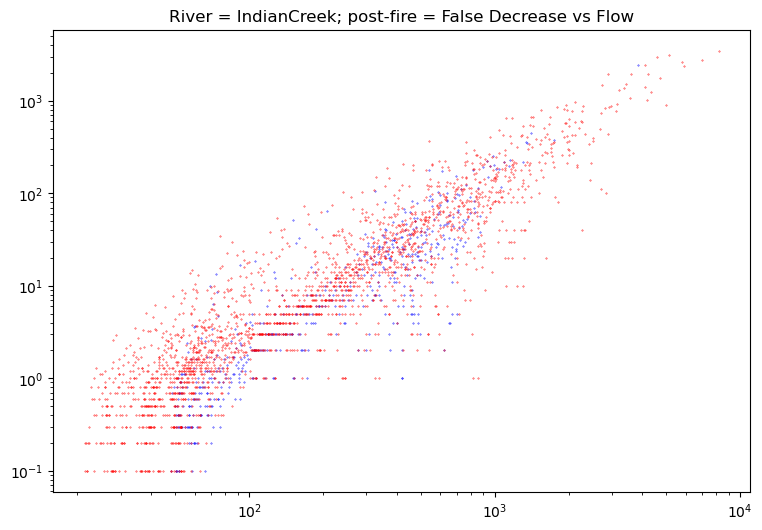

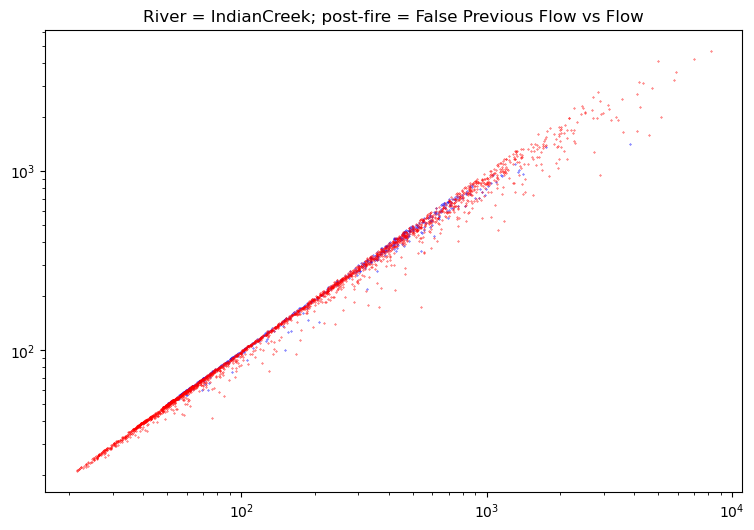

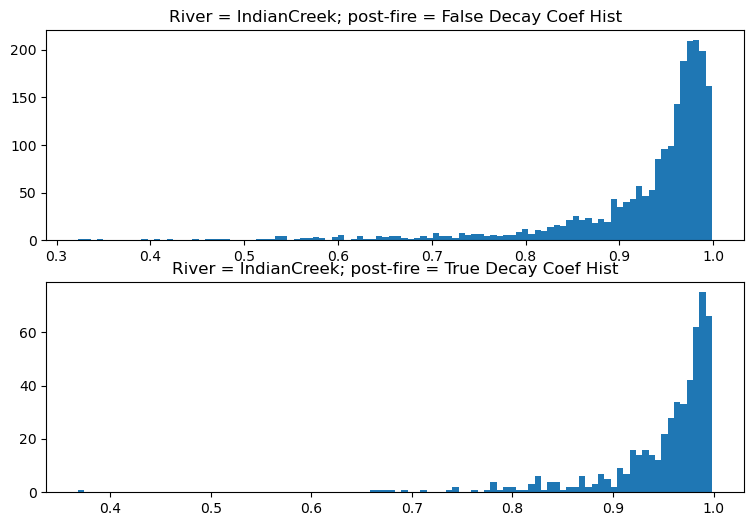

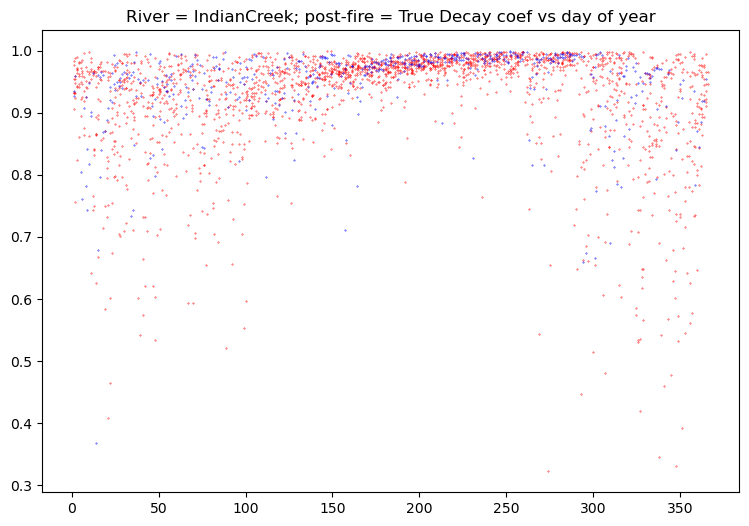

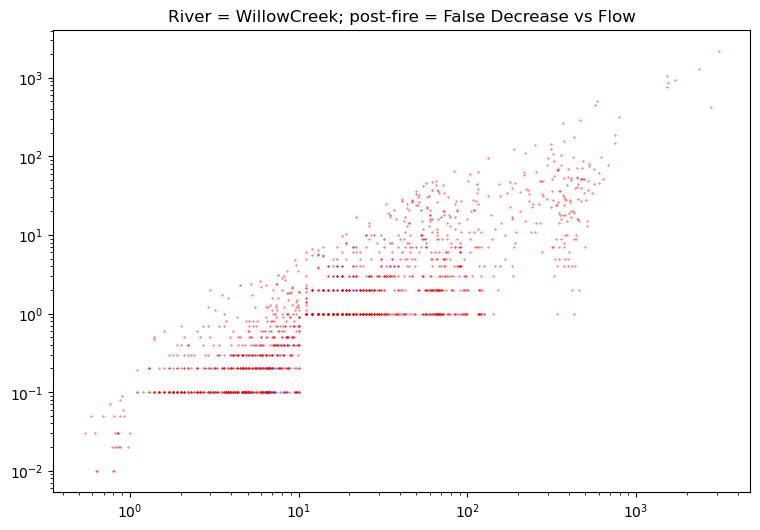

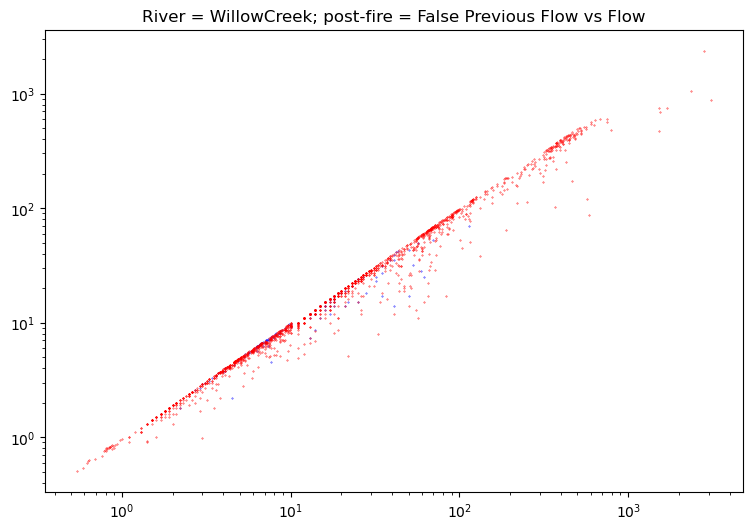

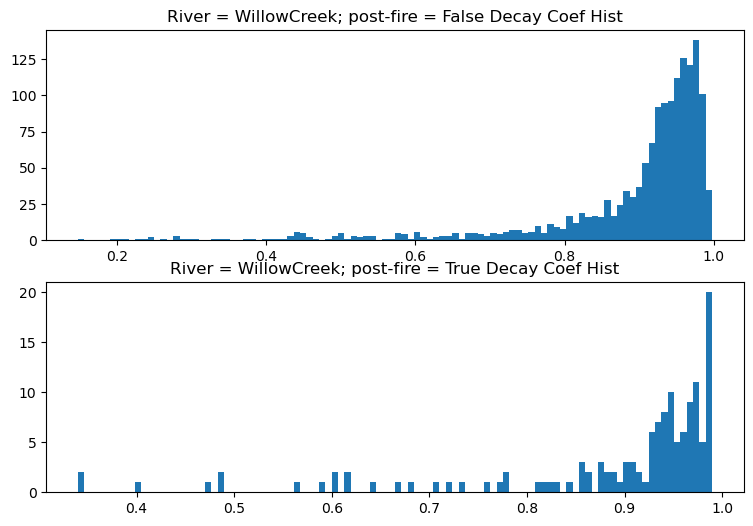

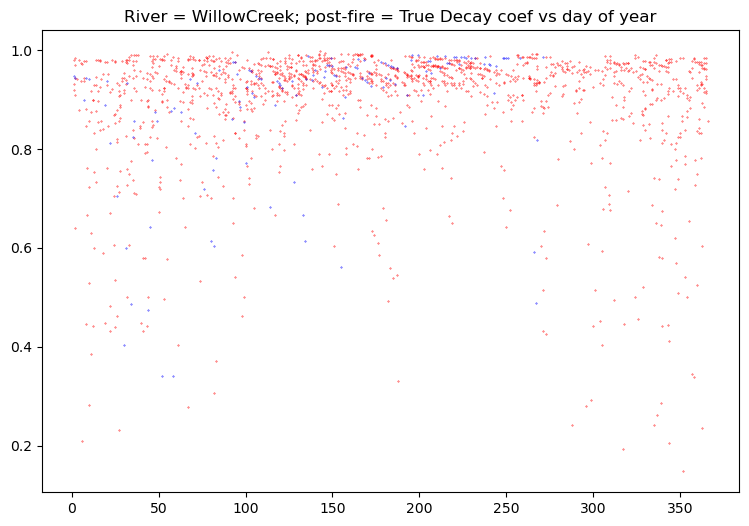

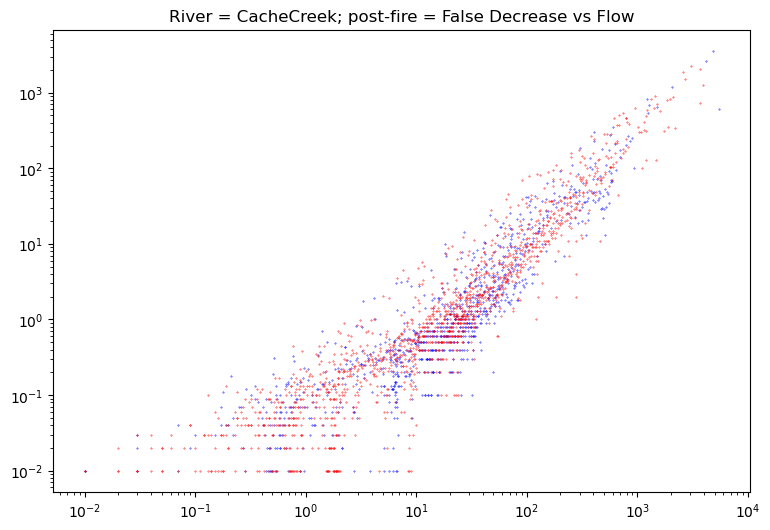

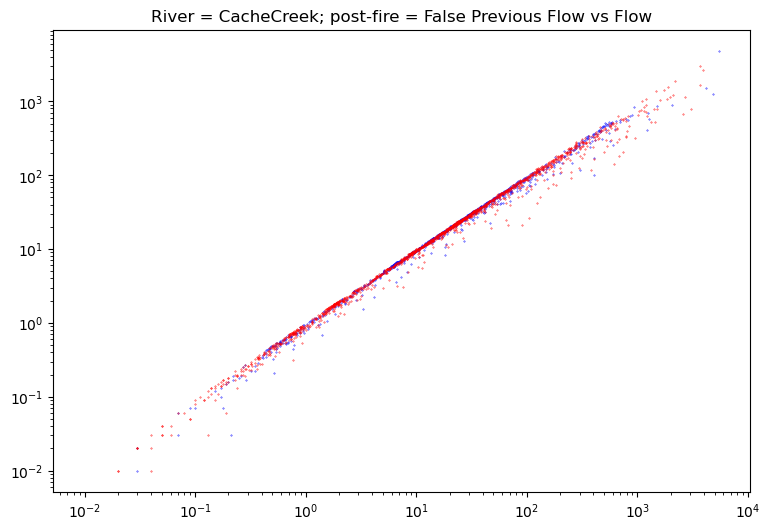

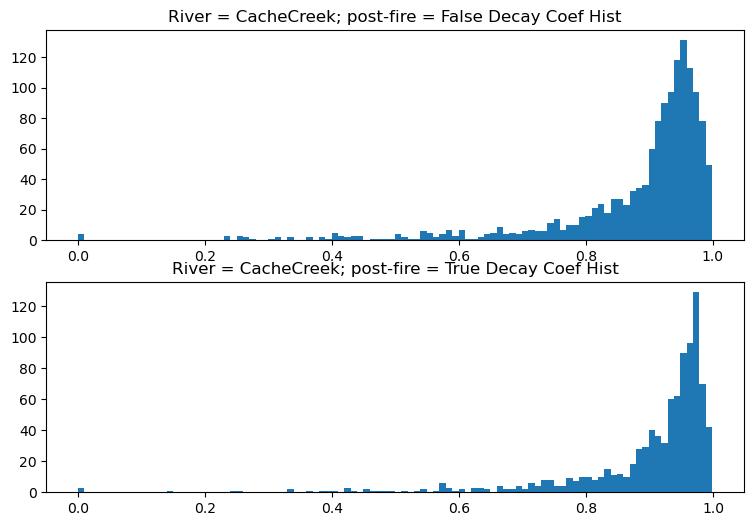

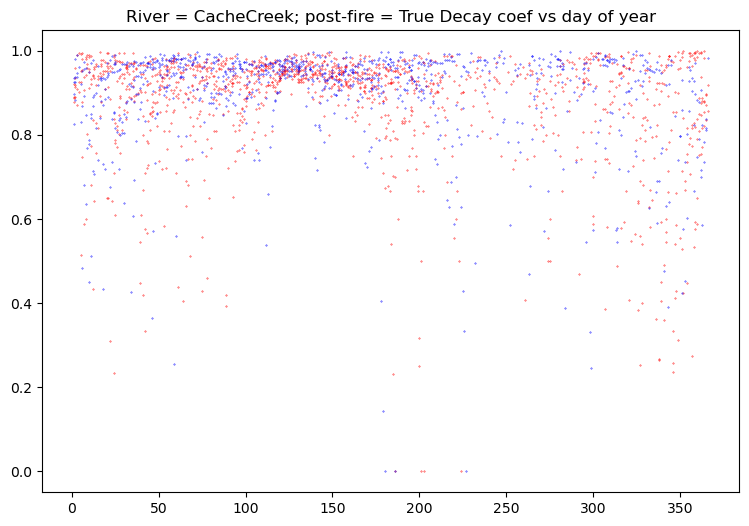

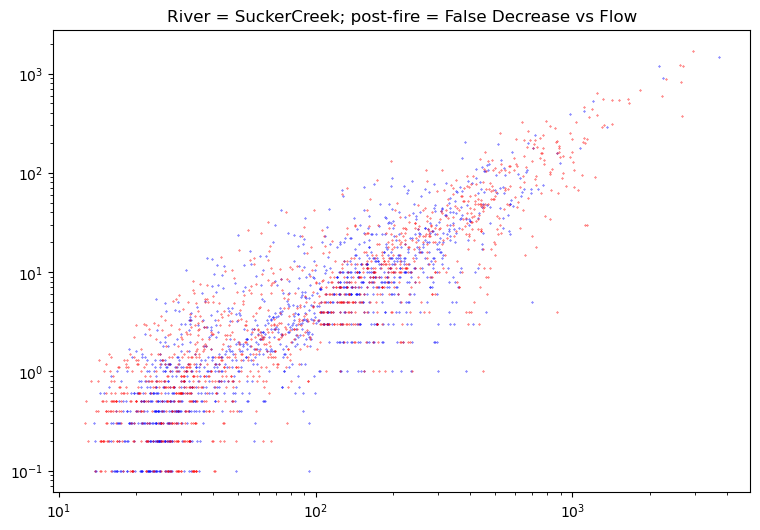

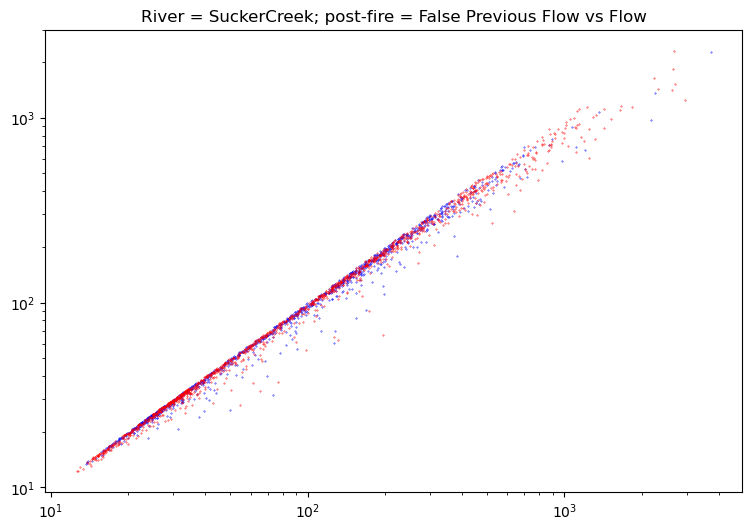

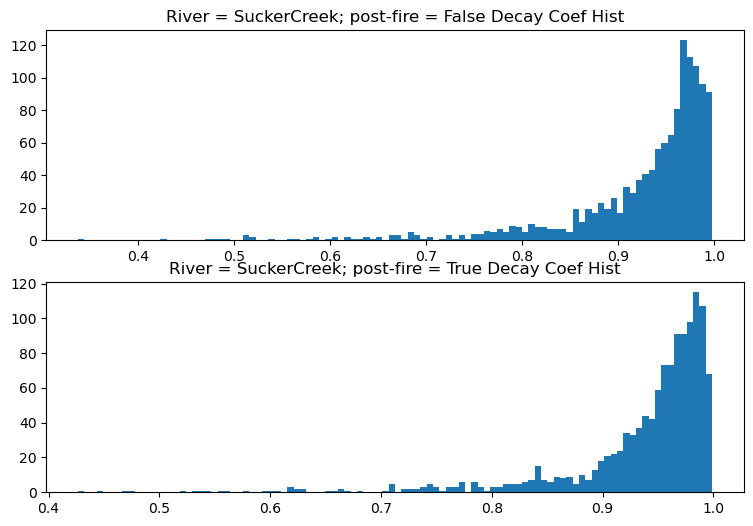

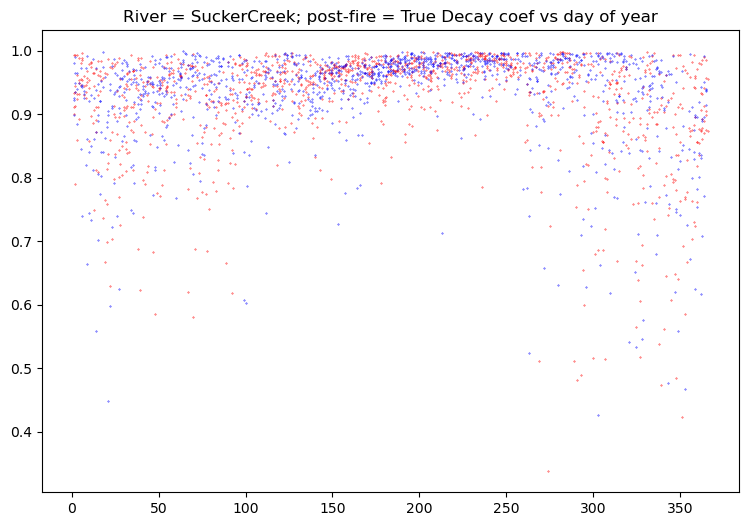

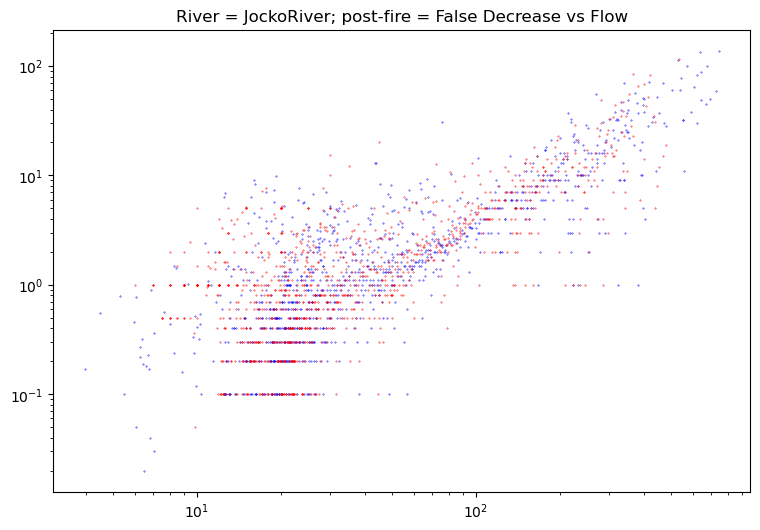

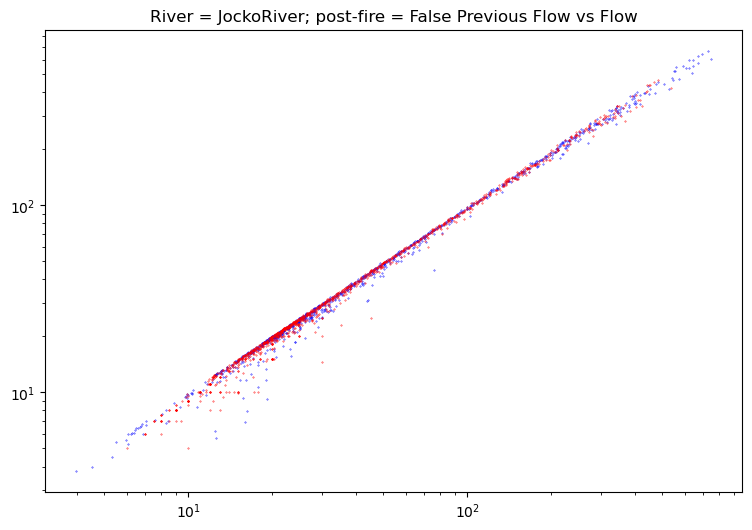

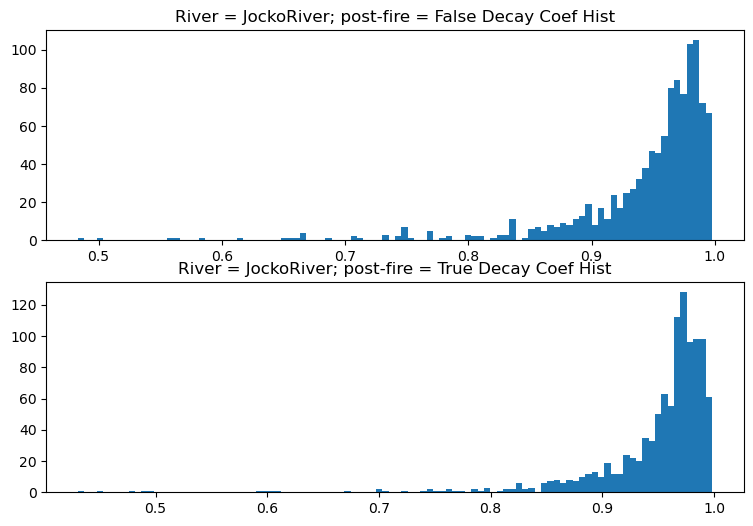

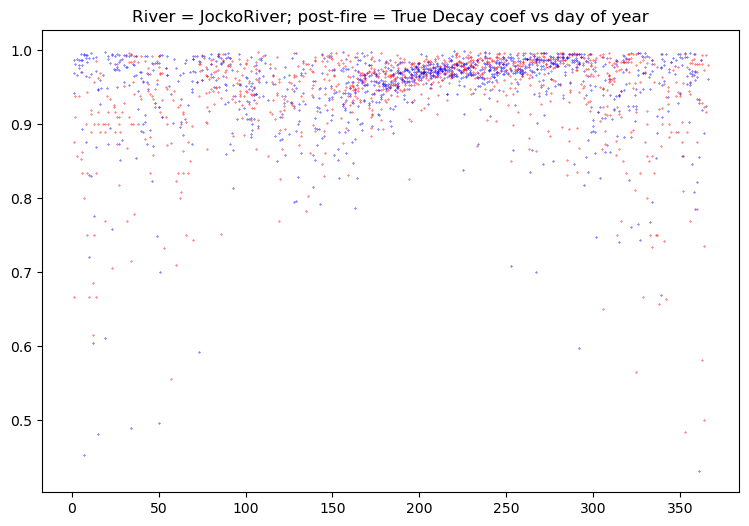

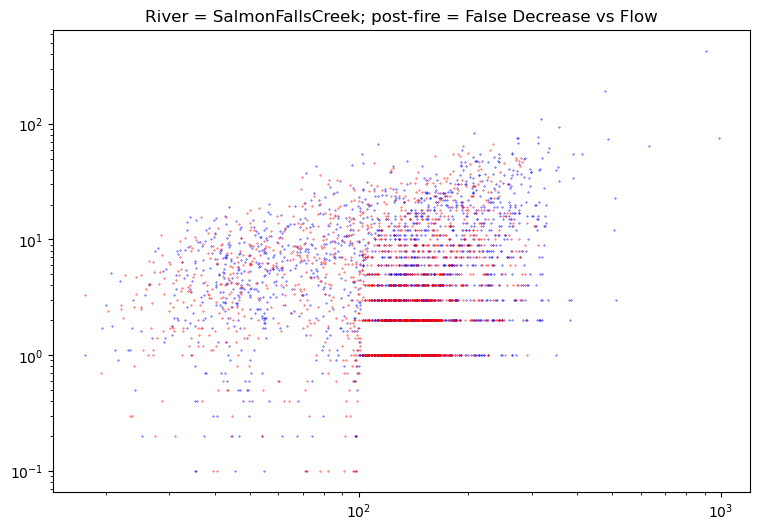

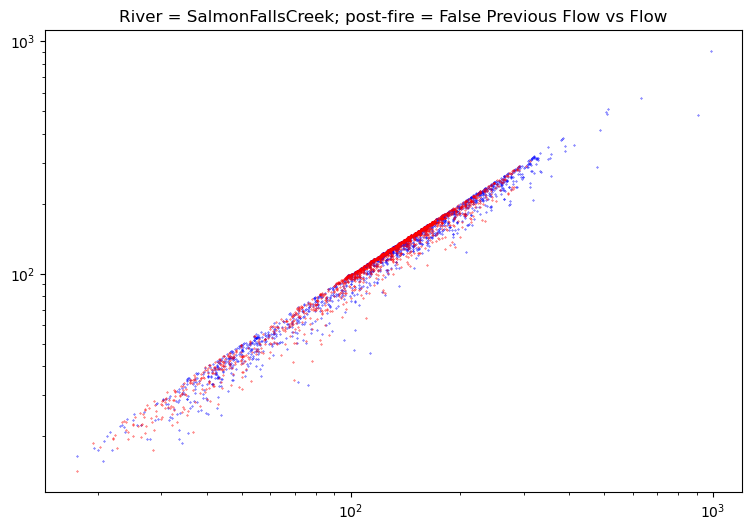

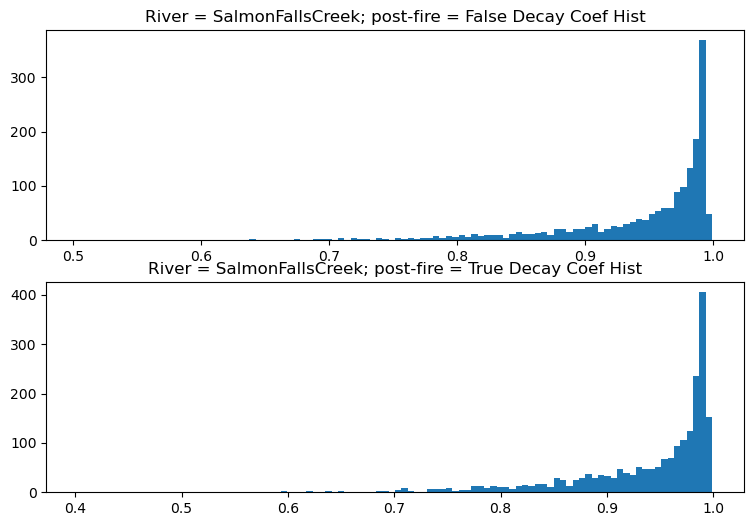

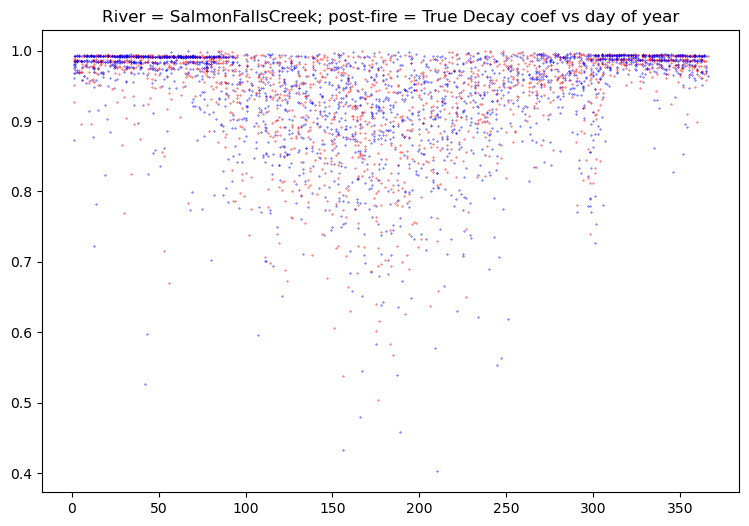

In [44]:
for river in rivers:
    decrease_df = summer_df[summer_df['discharge_' + river + '_daily_change'] < 0]

    decrease_df= decrease_df.drop(decrease_df[decrease_df['year']==fire_year[river]].index)

    fig, ax = plt.subplots(figsize = (9, 6))
    for (v, c) in [(1, 'b'), (0, 'r')]:
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['discharge_'+ river + '_previous_day'], decrease_df[decrease_df['post-fire_' + river] == v]['discharge_' + river + '_daily_change_positive'], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decrease vs Flow')
    ax.set_xscale("log")
    ax.set_yscale("log")
    fig, ax = plt.subplots(figsize = (9, 6))
    for (v, c) in [(1, 'b'), (0, 'r')]:
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['discharge_'+ river + '_previous_day'], decrease_df[decrease_df['post-fire_' + river] == v]['discharge_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Previous Flow vs Flow')
    ax.set_xscale("log")
    ax.set_yscale("log")
    fig, ax = plt.subplots(2, figsize = (9, 6))
    for (v, c) in [(0, 'r'), (1, 'b')]:
        ax[v].hist(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river], 100)
        ax[v].set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decay Coef Hist')
        print('River = ' + river + '; post-fire = ' + str(bool(v)) + '; mean decay coef = ' + str(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river].mean()) + \
             ' +/- ' + str(decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].std()/decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].count()))
    fig, ax = plt.subplots(figsize = (9, 6))    
    for (v, c) in [(0, 'r'), (1, 'b')]:    
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['day_of_year'], decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decay coef vs day of year')


In [40]:
pd.to_datetime(summer_df['datetime']).dt.dayofyear

0         1
1         2
2         3
3         4
4         5
       ... 
8372    361
8373    362
8374    363
8375    364
8376    365
Name: datetime, Length: 8377, dtype: int64